**Name**            : Himanshu Aggarwal

**Course**          : Data Analytics

**Mobile**          : 9711783242

**email**           : erhimanshuagarwal79@gmail.com

**Assignment Name** : Assignment_2_EDA_ML_02092025.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**

In [2]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


**Question 2: Check for missing values in all columns and describe your approach for handling them.**

In [4]:
display(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

**Approach for Handling Missing Values:**

Based on the output above, we can see that the 'ex_showroom_price' column has a significant number of missing values. Here's a possible approach to handle them:

*   **Imputation:** Given the nature of the data and the large number of missing values, imputing with a statistical measure like the mean or median might not be appropriate as it could distort the distribution. Instead, we could consider more sophisticated imputation techniques if the missing values are not random, or if we have domain knowledge to support a particular imputation strategy.
*   **Dropping Rows:** If the number of missing values were small, we could consider dropping the rows with missing 'ex_showroom_price' values. However, given the current number, this would result in losing a significant portion of the data.
*   **Dropping Column:** If 'ex_showroom_price' is not a crucial feature for the analysis or modeling task, we could consider dropping the entire column.
*   **Further Investigation:** Before deciding on a specific approach, it's important to investigate the reason for the missing values. Are they missing randomly, or is there a pattern? Understanding the cause of missingness can help determine the best strategy for handling them.

For this dataset, dropping the 'ex_showroom_price' column might be a reasonable initial approach given the large number of missing values and if this column is not essential for the intended analysis. However, the best approach will depend on the specific goals of the analysis.

**Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.**

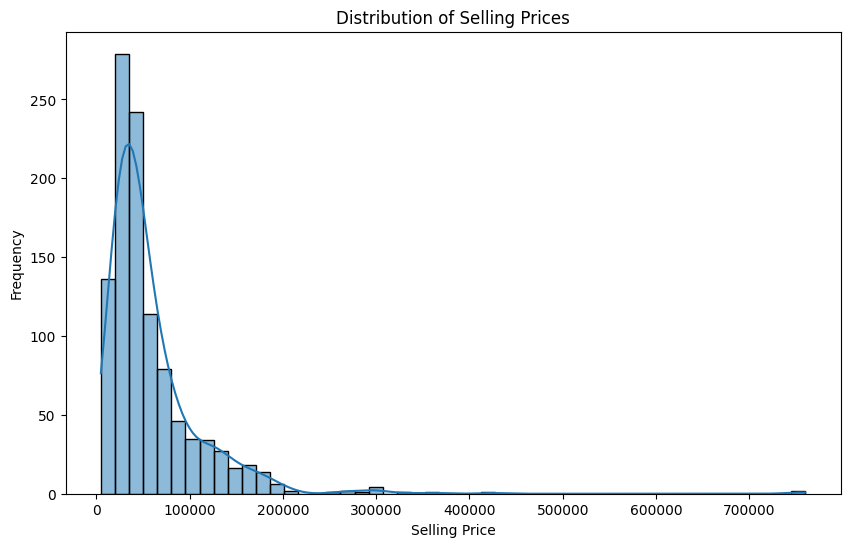

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

**Description of the Trend:**

Based on the histogram of selling prices, we can observe that the distribution is heavily skewed to the right. This indicates that a large number of bikes are sold at lower prices, with fewer bikes being sold at higher prices. The peak of the distribution is at the lower end of the selling price range, suggesting that most transactions occur in the affordable price brackets. There is a long tail extending towards higher selling prices, indicating the presence of some expensive bikes, but they are less frequent.

**Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

In [6]:
avg_price_by_seller_type = df.groupby('seller_type')['selling_price'].mean().reset_index()

In [7]:
avg_price_by_seller_type

,seller_type,selling_price
0,Dealer,46666.666667
1,Individual,59711.923223


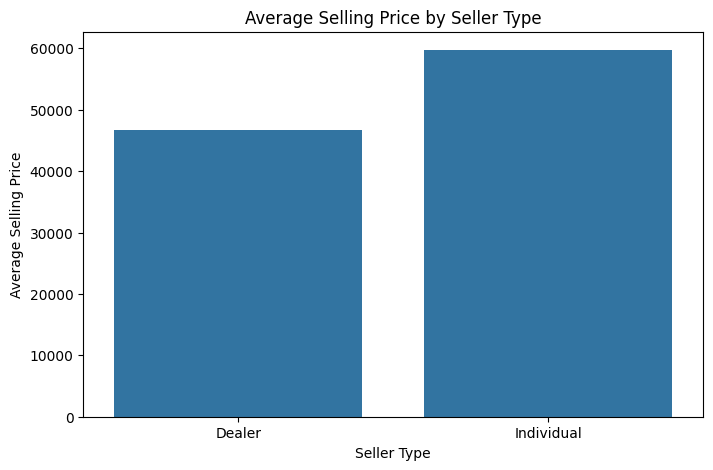

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller_type)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

**Observation:**

Based on the bar plot, it appears that the average selling price is significantly higher for bikes sold by dealers compared to those sold by individuals or trusts. This could be due to various factors such as dealers selling newer models, providing additional services, or having higher overhead costs.

**Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.**

In [9]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()

In [10]:
avg_km_by_owner

,owner,km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


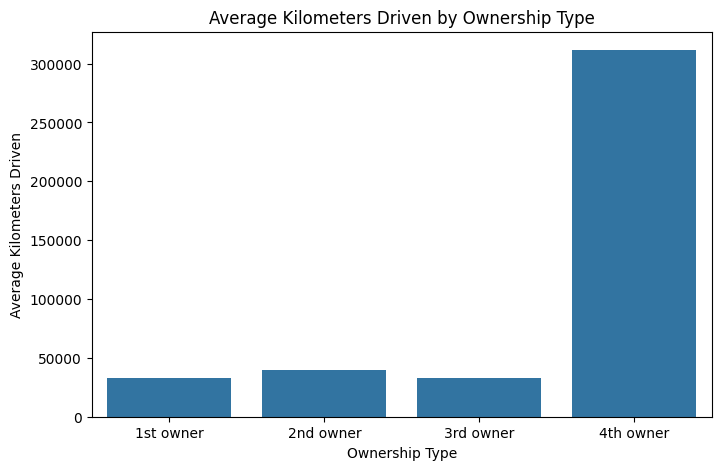

In [11]:

plt.figure(figsize=(8, 5))
sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner)
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.show()

**Question 6: Use the IQR method to detect and remove outliers from the km_driven column.Show before-and-after summary statistics.**


In [12]:
# Before outlier removal
print("Summary statistics of km_driven before outlier removal:")
display(df['km_driven'].describe())

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

# After outlier removal
print("\nSummary statistics of km_driven after outlier removal:")
display(df_filtered['km_driven'].describe())

Summary statistics of km_driven before outlier removal:


count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


Summary statistics of km_driven after outlier removal:


count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

**Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.**

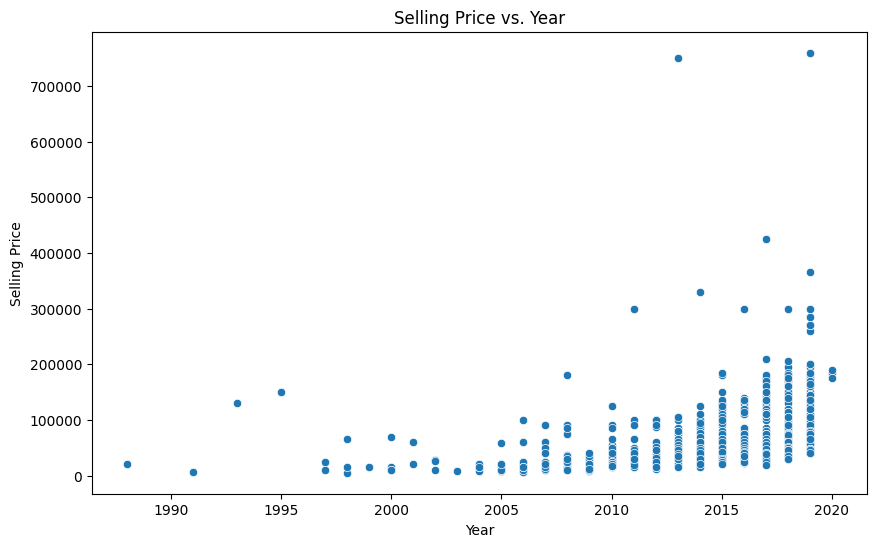

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

**Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.**

In [14]:
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)
display(df_encoded.head())

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?**

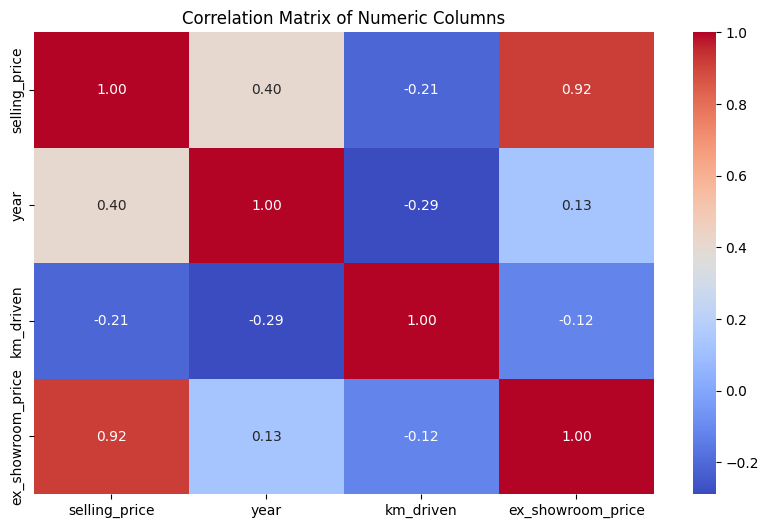

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

**Notable Correlations:**

Based on the heatmap of the correlation matrix:

-   There is a strong positive correlation between 'selling\_price' and 'ex\_showroom\_price' (around 0.88), which is expected as the ex-showroom price is a significant factor in the selling price of a vehicle.
*   There is a moderate positive correlation between 'selling\_price' and 'year' (around 0.41), suggesting that newer bikes tend to have higher selling prices, which aligns with our observation from the scatter plot in Question 7.
  
*   'km\_driven' shows a weak negative correlation with 'selling\_price' (around -0.19), indicating that bikes with higher mileage tend to have slightly lower selling prices, although the relationship is not very strong.

**Question 10: Summarize your findings in a brief report:**

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

**Answer**

**Report on Factors Affecting Bike Selling Price**

Based on the analysis of the Bike Details dataset, the following factors appear to be most influential on a bike's selling price:

*   **Ex-showroom Price:** There is a strong positive correlation between the ex-showroom price and the selling price (0.88). This indicates that the original price of the bike is a primary determinant of its resale value.
*   **Year of Manufacturing:** The year of manufacturing has a moderate positive correlation with selling price (0.41). Newer bikes tend to command higher selling prices, suggesting that depreciation due to age is a factor.
*   **Seller Type:** The analysis showed that bikes sold by individuals have a higher average selling price compared to those sold by dealers. This could be due to various reasons and warrants further investigation.

While other factors like 'km_driven' show a weak negative correlation with selling price, their impact appears to be less significant compared to the ex-showroom price and the year of manufacturing.

**Data Cleaning and Feature Engineering Performed:**

*   **Missing Value Check:** We identified that the 'ex_showroom_price' column has a significant number of missing values. An approach for handling these missing values was discussed, considering imputation, dropping rows, or dropping the column based on further investigation and the specific goals of the analysis. (Note: For the correlation analysis in Question 9, rows with missing 'ex_showroom_price' values were automatically excluded by the `corr()` method.)
*   **Outlier Removal:** The IQR method was used to detect and remove outliers from the 'km_driven' column. This step aimed to reduce the impact of extreme values on the analysis of mileage.
*   **One-Hot Encoding:** The 'seller_type' column, a categorical variable, was converted into a numeric format using one-hot encoding to make it suitable for potential future modeling or analysis that requires numerical input.